In [1]:
#https://www.analyticsvidhya.com/blog/2020/01/how-to-perform-automatic-music-generation/
from music21 import *
#for listing down the file names
import os
import numpy as np
from music21.midi import percussion
from music21 import pitch

In [7]:
#defining function to read MIDI files
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  


    try: # file has instrument parts
        s2 = instrument.partitionByInstrument(midi)
        notes_to_parse = s2.parts[0].recurse() 
    except: # file has notes in a flat structure
        notes_to_parse = midi.flat.notes

 
    #finding whether a particular element is note or a chord
    for element in notes_to_parse:
                
        #note
        if isinstance(element, note.Note):
            midiNumber = element.pitch.midi
            if midiNumber>=35 and midiNumber<=82:
                notes.append(str(midiNumber))
                
        #chord
        #elif isinstance(element, chord.Chord):
        #    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [8]:
#specify the path
path='midi_songs/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])

Loading Music File: midi_songs/73_neworleans-funk_93_fill_4-4.mid
Loading Music File: midi_songs/3_rock_60_fill_4-4.mid
Loading Music File: midi_songs/116_rock_95_fill_4-4.mid
Loading Music File: midi_songs/135_soul_105_fill_4-4.mid
Loading Music File: midi_songs/26_hiphop_67_fill_4-4.mid
Loading Music File: midi_songs/87_neworleans-funk_93_fill_4-4.mid
Loading Music File: midi_songs/110_rock_95_fill_4-4.mid
Loading Music File: midi_songs/79_neworleans-funk_93_fill_4-4.mid
Loading Music File: midi_songs/90_neworleans-funk_93_fill_4-4.mid
Loading Music File: midi_songs/22_pop-soft_83_beat_4-4.mid
Loading Music File: midi_songs/133_soul_105_beat_4-4.mid
Loading Music File: midi_songs/149_soul_105_fill_4-4.mid
Loading Music File: midi_songs/2_rock_60_fill_4-4.mid
Loading Music File: midi_songs/36_hiphop_67_fill_4-4.mid
Loading Music File: midi_songs/55_funk_112_fill_4-4.mid
Loading Music File: midi_songs/137_soul_105_fill_4-4.mid
Loading Music File: midi_songs/125_rock_93_fill_4-4.mid
Loa

In [9]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))
print (unique_notes)

18
['58', '37', '51', '55', '48', '42', '46', '53', '47', '49', '50', '36', '40', '44', '45', '43', '59', '38']


(array([13.,  3.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([   6. ,  336.2,  666.4,  996.6, 1326.8, 1657. , 1987.2, 2317.4,
        2647.6, 2977.8, 3308. ]),
 <a list of 10 Patch objects>)

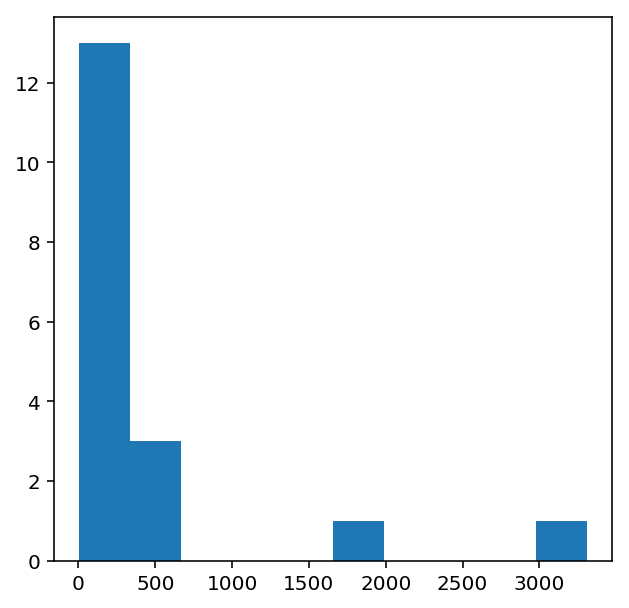

In [10]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [11]:
frequent_notes = [note_ for note_, count in freq.items() if count>=2]
print(len(frequent_notes))

18


In [13]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)

new_music

array([list(['48', '48', '50', '48', '48', '48', '48', '45', '45', '47', '45', '47', '45', '43', '43', '43', '43', '43', '43', '58', '43', '38', '38', '38', '38', '38', '38', '47', '38', '48', '38', '47', '38', '38', '40', '38', '38', '47', '38', '43']),
       list(['38', '38', '38', '38']),
       list(['42', '42', '36', '42', '42', '42', '42']),
       list(['50', '38', '38', '40', '38', '47', '48', '38', '38', '47', '48', '40', '38', '43', '43']),
       list(['38', '48', '48', '38', '38', '40', '45', '48', '45', '48', '38', '38', '43', '43']),
       list(['40', '40', '40', '38', '50', '38', '40', '38', '38', '40', '40', '45', '47', '47', '38', '50', '38', '38', '40', '40', '38', '38', '48', '40', '40', '37', '40', '47', '38', '40', '48', '47', '43', '43', '58']),
       list(['42', '42', '42', '42', '42', '38', '38', '40', '50', '58']),
       list(['38', '38', '40', '38', '40', '50', '45', '47', '38', '47', '38', '38', '50', '48', '38', '38']),
       list(['38', '44', '38', '38

In [16]:

no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)
print (x.shape, y.shape)
y

(5135, 32) (5135,)


array(['38', '38', '40', ..., '43', '43', '43'], dtype='<U2')

In [10]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))
x_note_to_int

{'50': 0,
 '37': 1,
 '47': 2,
 '58': 3,
 '48': 4,
 '38': 5,
 '51': 6,
 '46': 7,
 '36': 8,
 '22': 9,
 '53': 10,
 '49': 11,
 '59': 12,
 '42': 13,
 '45': 14,
 '40': 15,
 '44': 16,
 '26': 17,
 '55': 18,
 '43': 19}

In [11]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)
x_seq

array([[ 4,  4,  0, ...,  4,  5,  2],
       [ 4,  0,  4, ...,  5,  2,  5],
       [ 0,  4,  4, ...,  2,  5,  5],
       ...,
       [ 6,  6, 16, ...,  5,  5,  5],
       [ 6, 16,  5, ...,  5,  5, 19],
       [16,  5,  5, ...,  5, 19, 19]])

In [12]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])
y_seq

array([ 4,  4, 15, ..., 19, 19, 19])

In [13]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [36]:
x_tr

array([[18, 11, 11, ...,  9,  9, 13],
       [ 5,  5,  7, ...,  4, 19,  7],
       [13, 13, 13, ..., 13, 13, 13],
       ...,
       [ 5, 13,  5, ..., 13,  5, 13],
       [15, 13,  9, ..., 13, 13,  8],
       [13, 13,  9, ...,  5, 13, 17]])

In [14]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 100)           2000      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 32, 64)            19264     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 8, 128)           

In [15]:
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [16]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=15, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

/home/bikash/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4756 samples, validate on 1189 samples
Epoch 1/15
4756/4756 [==============================] - 3s 543us/step - loss: 2.1657 - val_loss: 2.0456

Epoch 00001: val_loss improved from inf to 2.04556, saving model to best_model.h5
Epoch 2/15
4756/4756 [==============================] - 0s 49us/step - loss: 1.8638 - val_loss: 1.9902

Epoch 00002: val_loss improved from 2.04556 to 1.99020, saving model to best_model.h5
Epoch 3/15
4756/4756 [==============================] - 0s 54us/step - loss: 1.7819 - val_loss: 1.8593

Epoch 00003: val_loss improved from 1.99020 to 1.85934, saving model to best_model.h5
Epoch 4/15
4756/4756 [==============================] - 0s 56us/step - loss: 1.7167 - val_loss: 1.8391

Epoch 00004: val_loss improved from 1.85934 to 1.83915, saving model to best_model.h5
Epoch 5/15
4756/4756 [==============================] - 0s 48us/step - loss: 1.6586 - val_loss: 1.8198

Epoch 00005: val_loss improved from 1.83915 to 1.81976, saving model to best_model.h5
Epoch

In [17]:
#loading best model
from keras.models import load_model
model = load_model('best_model.h5')

/home/bikash/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [18]:

import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(10):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [20]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]
predicted_notes

['48', '48', '48', '48', '48', '48', '48', '48', '48', '48']

In [35]:
import pretty_midi
#https://books.google.no/books?id=SUvODwAAQBAJ&pg=PA175&lpg=PA175&dq=pretty_midi+for+drum+midi+example&source=bl&ots=zROtaiYtB-&sig=ACfU3U1K6G433BUHSWAeuPOJo0rgNazstQ&hl=no&sa=X&ved=2ahUKEwiy89ffkcLoAhUawsQBHd6xCooQ6AEwA3oECAoQAQ#v=onepage&q=pretty_midi%20for%20drum%20midi%20example&f=false

def create_midi(notes):
    new_midi_data = pretty_midi.PrettyMIDI()
    drum_program = pretty_midi.instrument_name_to_program('SteelDrums')
    print (drum_program)
    drum = pretty_midi.Instrument(program=0, is_drum=True, name="Midi Drums")
    time = 0
    step = 0.1
    for note_number in notes:
        myNote = pretty_midi.Note(velocity=100, pitch=int(note_number), start=time, end=time+step)
        drum.notes.append(myNote)
        time += step
    new_midi_data.instruments.append(drum)
    return new_midi_data

new_midi_data = create_midi(predicted_notes)
print (new_midi_data)
new_midi_data.write('final.mid')

114


In [33]:
from pretty_midi import Instrument
pm = pretty_midi.PrettyMIDI("data/rock1.mid")
pm.instruments = [instrument for instrument in pm.instruments if instrument.is_drum]
print (pm.instruments)
drum = Instrument(program=0, is_drum=True)

[Instrument(program=0, is_drum=True, name="Midi Drums")]
